# Subproject b
- Platform attributes
- Author: Cecilia Avilés Robles (GitHub: cecyar) (mail: cecyar@gmail.com)

---

In [495]:
!pip install --user -q nltk

In [496]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [497]:
#import os
#import nltk
#import nltk.corpus
#from nltk import word_tokenize
#from nltk.tokenize import word_tokenize
#from nltk.probability import FreqDist
#from nltk.corpus import stopwords

In [498]:
import os
from nltk import * 

In [499]:
#nltk.download('punkt')
#nltk.download('stopwords')

In [500]:
data = pd.read_csv("project_data.csv")
data

,ID,ID del Médico,Codigo Medico,Especialidad del Médico,¿Ha considerado ofrecer consultas médicas a distancia (teleconsultas) a través de videoconferencias a sus pacientes?,"¿Del 1 al 5, qué tan común considera que será que sus pacientes soliciten teleconsultas médicas para atender sus padecimientos?","¿Cuenta con alguna plataforma digital que le ayude con la administración de sus servicios médicos (Por Ejemplo: con la gestión de citas, pagos, seguimiento a pacientes)?",¿Cuáles?,¿Cuenta con alguna plataforma digital para ofrecer teleconsultas?,¿Cuáles?2,Seleccione las funcionalidades que considera importantes para que estén presentes en una plataforma digital que lo apoye con la gestión de sus servicios médicos.,¿Cuánto estaría dispuesto a pagar mensualmente por el uso de la plataforma descrita?,"Si le ofrecieran una plataforma digital a un precio competitivo para facilitarle la gestión de su agenda de citas, cobros y seguimientos a pacientes, así como la posibilidad de llevar a cabo telec...",Fecha de nacimiento
0,721,1511533,1511533,Endocrinólogo,SI,5: Totalmente Común,SI,"No especifico, solicito llamada en agosto",SI,No especifico,"Solicito llamada después, estaba ocupada;",No pagaría por una,3: Neutral,26/03/70
1,386,1561268,1561268,Endocrinólogo,SI,3: Neutral,NO,NaN,NO,NaN,Envío y recepción de documentos con cliente (e...,No pagaría por una,3: Neutral,29/05/77
2,652,1514853,1514853,Internista,SI,2: Poco común,NO,NaN,SI,Skype,Creación automática de videoconferencias con c...,No pagaría por una,1: No la utilizaría,01/01/78
3,362,2166821,2166821,Internista,SI,3: Neutral,NO,NaN,SI,"Whatsap, zoom, meet",Envío y recepción de documentos con cliente (e...,No pagaría por una,2: Con poca regularidad,0
4,28,..,..,Internista,SI,4: Muy Común,NO,NaN,NO,NaN,Creación automática de videoconferencias con c...,Menos de $750,3: Neutral,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,533,joel,joel,Internista,NO,4: Muy Común,NO,NaN,NO,NaN,Creación automática de videoconferencias con c...,No pagaría por una,5: Regularmente,0
761,201,OZ,OZ,Internista,NO,5: Totalmente Común,NO,NaN,NO,NaN,Envío y recepción de documentos con cliente (e...,No pagaría por una,1: No la utilizaría,0
762,40,pitaluis,pitaluis,Internista,SI,2: Poco común,NO,NaN,NO,NaN,Creación automática de videoconferencias con c...,No pagaría por una,2: Con poca regularidad,0
763,63,Q531206,531206,Internista,NO,1: No será común,NO,NaN,NO,NaN,Administración de citas;,No pagaría por una,1: No la utilizaría,0


In [501]:
column_names = list(data.columns)

In [502]:
data.columns = ['ID', 'IDMED', 'COD', 'ESP', 'P1_CONSULTAS', 'P2_RANKING', 'P3_PLAT ADMON', 'R3', 'P4_PLAT CONSULTA',
               'R4', 'P5_ATRIBUTOS', 'P6_PAGO', 'P7_DISPOSICION', 'FNAC'] 

In [503]:
print(data.columns)

Index(['ID', 'IDMED', 'COD', 'ESP', 'P1_CONSULTAS', 'P2_RANKING',
       'P3_PLAT ADMON', 'R3', 'P4_PLAT CONSULTA', 'R4', 'P5_ATRIBUTOS',
       'P6_PAGO', 'P7_DISPOSICION', 'FNAC'],
      dtype='object')


In [504]:
attributes = data["P5_ATRIBUTOS"]

In [505]:
attributes.size

765

In [506]:
raw_attributes = []

for i in range(0, attributes.size):
    text_i = str(attributes[i])
    raw_attributes.append(text_i)

text_attributes = str(raw_attributes)

In [507]:
#text_attributes

In [508]:
answer_1a = "Creación automática de videoconferencias con clientes"
answer_1b = "Creación automática de videoconferencias"
answer_2 = "Envío y recepción de documentos con cliente (estudios, recetas médicas)"
answer_3 = "Administración de citas"
answer_4 = "Gestión de pagos"
answer_5 = "Despliegue de encuestas de satisfacción de clientes"
answer_6 = "Aplicación de promociones de descuento para clientes"

answers = [answer_1a, answer_1b, answer_2, answer_3, answer_4, answer_5, answer_6]

In [509]:
pre_counts = []

for i in range(0, len(answers)):
    count_i = text_attributes.count(answers[i])
    pre_counts.append(count_i)

In [510]:
counts = [pre_counts[0] + pre_counts[1], pre_counts[2], pre_counts[3], pre_counts[4], pre_counts[5], pre_counts[6]]
counts

[536, 363, 379, 245, 90, 111]

In [511]:
label_answers = "1. " + answer_1a + "\n" + "2. " + answer_2 + "\n" + "3. " + answer_3 + "\n" + "4. " + answer_4 + "\n" + "5. " + answer_5 + "\n" + "6. " + answer_6

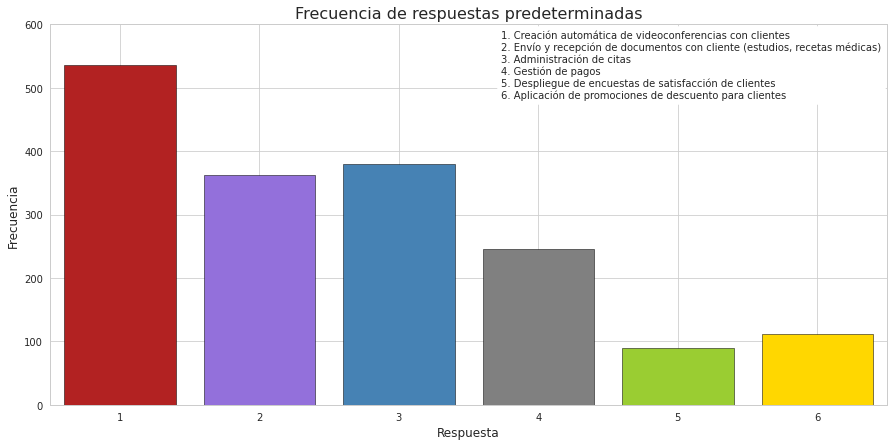

In [512]:
import seaborn as sns

sns.set_style("whitegrid")
fig = plt.figure(figsize = (15,7))
x = np.arange(1,7,1)

plt.bar(x, counts, color = ['firebrick','mediumpurple','steelblue','gray','yellowgreen','gold'], edgecolor = 'black')
plt.text(3.73, 483, label_answers, bbox = {"facecolor": "white"})  #loc='best'
plt.axis([0.5, 6.5, 0, 600])
plt.title("Frecuencia de respuestas predeterminadas", fontsize = 16)
plt.xlabel("Respuesta", fontsize = 12)
plt.ylabel("Frecuencia", fontsize = 12)
plt.show()

In [513]:
plot_answers = [answer_1a, answer_2, answer_3, answer_4, answer_5, answer_6]
plot_info = pd.DataFrame({'Answer': plot_answers, 'Freq': counts,})
pie_info = plot_info.sort_values(by = 'Freq', ascending = False)

<Figure size 1080x720 with 0 Axes>

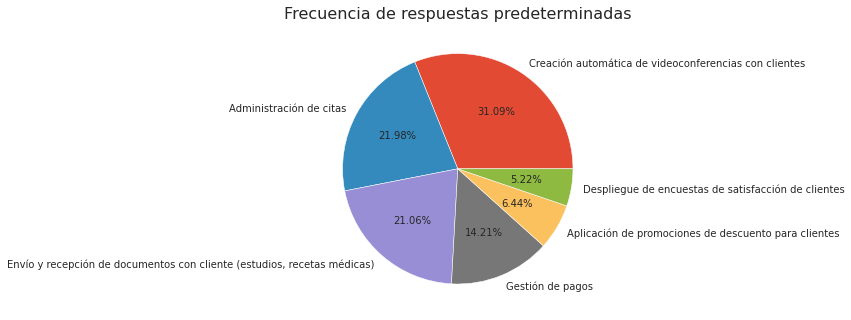

In [514]:
sns.set_style("whitegrid")

fig = plt.figure(figsize = (15,10))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(pie_info.Freq, labels = pie_info.Answer, autopct = '%1.2f%%')
plt.title("Frecuencia de respuestas predeterminadas", fontsize = 16)
plt.show()

In [515]:
pre_written_ans = text_attributes

for i in range(0, len(answers)):
    pre_written_ans = pre_written_ans.replace(str(answers[i]),"")
    
print(pre_written_ans)

['Solicito llamada después, estaba ocupada;', ';;', ';', ';', ';;', ';;;', ';;;; ;', ';', ';;;;;;', ';;', 'Ninguna;', ';;;', ';;;; ;', ';', ';;;;; ;', ';', ';', ';; ;', ';', ';', 'Todas;', ';;;;', ' ;', ';;;;;;', ';;', 'no le es funcional prefiere genera todo en físico ;', ';;;', ';;', ';;;;; ;', ';;;', ' ;', ';;;;; ;', 'Que ofreca buena calidad y apoye con el costo ;', 'Ninguna;', ';;;', ';', ';', ';', ';;;;;;', ';;;;', 'No he considerado la opcion;', ';', ';', ';', ';;', ';;', ';;;;', ';;', ';', ';;', ';;;;;', 'Todas;', ';;;', ';', 'NO TENGO ASISTENTE;', ';;; ;', 'Usa whats app;', ';;;', ';;', ';', ';', 'Que pudiera llevar todo mi secretaria;', 'No lo creo viable;', ';', ';;', ';;;;', ';;;;;', 'No la requiere;', ';;', ';;;;', ';', ';;;', ';; ;', ';;', 'No usa;', ' ;', ';', 'Que nos ofrezca buena calidad ;', ';;', ';;;', ';', ';; ;', ';;;;; ;', ';;', ';;;;;', ';', ';;;; ;', ';;;;; ;', ';;;', ';;; ;', ';; ;', ';;; ;', ';;', ';;;;;;', ';', 'Que nos apoye y de calidad;', 'Wats, zoom, tea

In [516]:
pre_written_ans = pre_written_ans.translate({ord(i): None for i in ";',[]()"})
pre_written_ans

'Solicito llamada después estaba ocupada           Ninguna             Todas      no le es funcional prefiere genera todo en físico           Que ofreca buena calidad y apoye con el costo  Ninguna       No he considerado la opcion           Todas   NO TENGO ASISTENTE   Usa whats app     Que pudiera llevar todo mi secretaria No lo creo viable     No la requiere        No usa    Que nos ofrezca buena calidad                          Que nos apoye y de calidad Wats zoom teams incluso webex            No necesita ya tiene    No    Ninguna  No me gusta    No me interesaría   Ni No la Usaría  A No     No me interesa   No No Otros especificar  No me interesa          Que nos proporcionará todo y buen precio accesible       Solo de seguimiento            No considero usar platafromas de ninguna para atender pacientes en esa modalidad             Son gratis       De seguimiento                           Que englobar a varias        No me interesa dar teleconsulta NO ME INTERESA     No Informaci

In [517]:
to_replace = ["NO", "NINGUNA", "INTERESA", "intereza", "interezado", "."]
replaced = ["No", "Ninguna", "interesa", "interesa", "interesa", ""]

In [518]:
written_ans = pre_written_ans

for i in range(0, len(to_replace)):
    written_ans = written_ans.replace(to_replace[i],replaced[i])
    
print(written_ans)

Solicito llamada después estaba ocupada           Ninguna             Todas      no le es funcional prefiere genera todo en físico           Que ofreca buena calidad y apoye con el costo  Ninguna       No he considerado la opcion           Todas   No TENGO ASISTENTE   Usa whats app     Que pudiera llevar todo mi secretaria No lo creo viable     No la requiere        No usa    Que nos ofrezca buena calidad                          Que nos apoye y de calidad Wats zoom teams incluso webex            No necesita ya tiene    No    Ninguna  No me gusta    No me interesaría   Ni No la Usaría  A No     No me interesa   No No Otros especificar  No me interesa          Que nos proporcionará todo y buen precio accesible       Solo de seguimiento            No considero usar platafromas de ninguna para atender pacientes en esa modalidad             Son gratis       De seguimiento                           Que englobar a varias        No me interesa dar teleconsulta No ME interesa     No Informacio

In [519]:
token_words = word_tokenize(written_ans)

In [520]:
fdist = FreqDist(token_words)
fdist

FreqDist({'No': 50, 'Ninguna': 15, 'interesa': 15, 'Que': 12, 'de': 11, 'le': 10, 'el': 10, 'la': 10, 'en': 8, 'me': 8, ...})

In [521]:
fdist_top = fdist.most_common(40)
fdist_top

[('No', 50),
 ('Ninguna', 15),
 ('interesa', 15),
 ('Que', 12),
 ('de', 11),
 ('le', 10),
 ('el', 10),
 ('la', 10),
 ('en', 8),
 ('me', 8),
 ('no', 7),
 ('a', 7),
 ('que', 7),
 ('Todas', 6),
 ('todo', 6),
 ('esta', 6),
 ('calidad', 5),
 ('y', 5),
 ('con', 5),
 ('lo', 5),
 ('nos', 5),
 ('es', 4),
 ('por', 4),
 ('muy', 4),
 ('buena', 3),
 ('apoye', 3),
 ('mi', 3),
 ('para', 3),
 ('pacientes', 3),
 ('varias', 3),
 ('o', 3),
 ('momento', 3),
 ('hospital', 3),
 ('informacion', 3),
 ('se', 3),
 ('interesado', 3),
 ('LE', 3),
 ('como', 3),
 ('he', 2),
 ('whats', 2)]

In [522]:
nltk.download('stopwords')
a = set(stopwords.words('spanish'))

pre_processed_text = word_tokenize(written_ans.lower())
processed_text = [x for x in pre_processed_text if x not in a]

print(processed_text)

['solicito', 'llamada', 'después', 'ocupada', 'ninguna', 'todas', 'funcional', 'prefiere', 'genera', 'físico', 'ofreca', 'buena', 'calidad', 'apoye', 'costo', 'ninguna', 'considerado', 'opcion', 'todas', 'asistente', 'usa', 'whats', 'app', 'pudiera', 'llevar', 'secretaria', 'creo', 'viable', 'requiere', 'usa', 'ofrezca', 'buena', 'calidad', 'apoye', 'calidad', 'wats', 'zoom', 'teams', 'incluso', 'webex', 'necesita', 'ninguna', 'gusta', 'interesaría', 'usaría', 'interesa', 'especificar', 'interesa', 'proporcionará', 'buen', 'precio', 'accesible', 'solo', 'seguimiento', 'considero', 'usar', 'platafromas', 'ninguna', 'atender', 'pacientes', 'modalidad', 'gratis', 'seguimiento', 'englobar', 'varias', 'interesa', 'dar', 'teleconsulta', 'interesa', 'informacion', 'utilizo', 'computadora', 'consultas', 'ninguna', 'utilidad', 'cosiderado', 'acostumbra', 'utiliza', 'usaria', 'interesa', 'ninguna', 'interesa', 'gestione', 'gran', 'parte', 'podria', 'ser', 'ayuda', 'casos', 'todas', 'especificar'

[nltk_data] Downloading package stopwords to /home/miuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [523]:
fdist2 = FreqDist(processed_text)

In [524]:
fdist_top2 = fdist2.most_common(50)
fdist_top2

[('ninguna', 16),
 ('interesa', 15),
 ('todas', 6),
 ('calidad', 5),
 ('informacion', 5),
 ('hospital', 4),
 ('buena', 3),
 ('apoye', 3),
 ('necesita', 3),
 ('pacientes', 3),
 ('varias', 3),
 ('momento', 3),
 ('plataformas', 3),
 ('interesado', 3),
 ('usa', 2),
 ('whats', 2),
 ('app', 2),
 ('creo', 2),
 ('especificar', 2),
 ('solo', 2),
 ('seguimiento', 2),
 ('dar', 2),
 ('usaria', 2),
 ('informativa', 2),
 ('realmente', 2),
 ('ver', 2),
 ('útil', 2),
 ('bueno', 2),
 ('solicito', 1),
 ('llamada', 1),
 ('después', 1),
 ('ocupada', 1),
 ('funcional', 1),
 ('prefiere', 1),
 ('genera', 1),
 ('físico', 1),
 ('ofreca', 1),
 ('costo', 1),
 ('considerado', 1),
 ('opcion', 1),
 ('asistente', 1),
 ('pudiera', 1),
 ('llevar', 1),
 ('secretaria', 1),
 ('viable', 1),
 ('requiere', 1),
 ('ofrezca', 1),
 ('wats', 1),
 ('zoom', 1),
 ('teams', 1)]